# Data-Oriented Programming Paradigms: Exercise 3

This jupyter notebook should be used for merging the different datasets we have.   
Every person has their own cell where they can prepare their data so it matches the structure we agreed on.  
[Format Picture](pandasformat.png) - The two indexes should be named **year** and **country_name**

##### Take Note: (Add additional points to the list if needed)

* Put your data files into the data/ directory (make sure your files have reasonable size)
* Try to name your data variable appropriately (e.g. use initials)
* When you commit your changes try to reduce unnecessary jupyter notebook output to a minimum so it is easier for everyone to read the commits on Github

## General Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry

## Data preparation (done individually)

The data is collected from different sources. Each group member collected relevant data. The outcome of the collection is 4 csv files. The data mainly includes information about the health, the bank information and the status of the country. <br>
The data is loaded from each file. Attributes are selected according to relevance. The attributes "year" and "country_name" are present in all datasets. The names of these attributes are changed and set as index all datasets to facilitate data merging.  

In [2]:
## Bogensperger Johannes
data_wb = pd.read_csv('data/Data_Dump_Worldbank_301219_V2/data_worldbank.csv', delimiter=',', header=0,
                      usecols=['year', 'country_name',  # 'Country_code',
                               'GDP per capita',
                               'life expectancy at birth',
                               'physicians (per 1,000)',
                               'hospital beds (per 1,000)',
                               'nurses and midwives (per 1,000)',
                               'urban population (% of total pop)',
                               'government health expenditure (% of GDP)',
                               'government health expenditure per capita, PPP ',
                               'private health expenditure (% total health exp)',
                               'GDP (current US$)',
                               'GDP per capita, PPP (current international $)',
                               'coverage of social insurance (%)',
                               'coverage of social protection and labor programs (%)'],
                      names=['year', 'time_code', 'country_name', 'country_code',
                             'GDP per capita',
                             'life expectancy at birth',
                             'physicians (per 1,000)',
                             'hospital beds (per 1,000)',
                             'nurses and midwives (per 1,000)',
                             'urban population (% of total pop)',
                             'government health expenditure (% of GDP)',
                             'government health expenditure per capita, PPP ',
                             'private health expenditure (% total health exp)',
                             'GDP (current US$)',
                             'GDP per capita, PPP (current international $)',
                             'coverage of social insurance (%)',
                             'coverage of social protection and labor programs (%)']
                      )

data_health = pd.read_csv('data/Data_Dump_Health_Stats_301219_V2/data_health_wb.csv', delimiter=',', header=0,
                          usecols=['year', 'country_name',  # 'Country Code',
                                   'smoking prevalence, total',
                                   'alcohol consumption per capita (liters)',
                                   'people with drinkwater (%)',
                                   'people with basic handwashing (%)',
                                   'school enrollment, primary',
                                   'school enrollment, secondary',
                                   'school enrollment, tertiary'],
                          names=['year', 'Year Code', 'country_name', 'Country Code',
                                 'smoking prevalence, total',
                                 'alcohol consumption per capita (liters)',
                                 'people with drinkwater (%)',
                                 'people with basic handwashing (%)',
                                 'school enrollment, primary',
                                 'school enrollment, secondary',
                                 'school enrollment, tertiary'])

data_wb = data_wb.dropna(how='any')#Drop those last NA lines in the file..
data_wb['year'] = data_wb['year'].astype(dtype='int64')
data_wb.set_index(['year', 'country_name'], drop=True, append=False, inplace=True)
data_wb.replace("..", np.NaN, inplace=True)
data_wb = data_wb.astype(dtype=float)

data_health = data_health.dropna(how='any')#Drop those last NA lines in the file..
data_health['year'] = data_health['year'].astype(dtype='int64')#
data_health.set_index(['year', 'country_name'], drop=True, append=False, inplace=True)
data_health.replace("..", np.NaN, inplace=True)
data_health = data_health.astype(dtype=float)

In [3]:
## Stephan Siegl
data_ss = pd.read_csv("data/characteristics_siegl.csv")
data_ss.rename(columns={"time" : "year", }, inplace=True)
# drop not needed columns
data_ss.drop(['time_code', 'country_code'], axis=1, inplace=True)

data_ss.set_index(["year", "country_name"], inplace=True)
data_ss.sort_values(["year", "country_name"], ascending=True, inplace=True)
# set .. values to NaN
data_ss.replace("..", np.NaN, inplace=True)
# change to numeric values
data_ss = data_ss.apply(pd.to_numeric)
#data_ss.dtypes
#fig = plt.figure(figsize=(9, 7))
#plt.xticks(range(data_ss.shape[1]), data_ss.columns, fontsize=11)
#plt.xticks(rotation=90)
#plt.yticks(range(data_ss.shape[1]), data_ss, fontsize=11)
#plt.title('Correlation Matrix', fontsize=16)
#sns.heatmap(data_ss.corr())
#plt.plot()

In [4]:
## Maroua Jaoua
data_who = pd.read_csv('data/who_data.csv', delimiter=',', header=0,                       
                       usecols=['Country', 'Year', 
                                'Status', 'Adult Mortality', 'infant deaths', 
                                'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 
                                'Polio', 'Diphtheria ', ' HIV/AIDS',
                                ' thinness  1-19 years', ' thinness 5-9 years'])
data_who.columns =['country_name', 'year',
                   'Status', 'Adult Mortality', 'infant deaths',
                   'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
                   'Polio', 'Diphtheria', ' HIV/AIDS',
                   'thinness  1-19 years', 'thinness 5-9 years']
data_who['year'] = data_who['year'].astype(dtype='int64')
data_who.set_index(['year', 'country_name'], drop=True, append=False, inplace=True)
data_who.sort_index(inplace=True)
data_who = data_who.loc[:, data_who.columns != 'Status'].astype(dtype=float)
#data_who

## Merging DATA

After loading the data and setting a common index between all the dataframes, the latters are merged. A full outer join is performed. Furthemore, the number of columns and rows of the data are shown. The merged dataset includes 46 attributes and 15959. 

In [5]:
# merge data according to multiindex year and country_name
OUTPUTPATH = 'data/preprocessedData.csv'

#TODO check if sizes get bigger --> indicator index is broken.. (keep attention to have index year=int64, country_name=object 
merged_data = data_health.merge(right=data_wb, how='outer', left_index=True, right_index=True)
merged_data = merged_data.merge(right=data_ss, how='outer',  left_index=True, right_index=True)
merged_data = merged_data.merge(right=data_who, how='outer',  left_index=True, right_index=True)

print('Shape WB Data:' + str(data_wb.shape))
print('Shape Health Data:' + str(data_health.shape))
print('Shape SS Data:' + str(data_ss.shape))
print('Shape WHO Data:' + str(data_who.shape))
#ADDD 

print('Shape final merged Data:' + str(merged_data.shape))

merged_data.to_csv(OUTPUTPATH, header=True, index=True, encoding='')


Shape WB Data:(13020, 13)
Shape Health Data:(15540, 7)
Shape SS Data:(4340, 15)
Shape WHO Data:(2938, 11)
Shape final merged Data:(15959, 46)


## Data Exploration

Since an outer join is performed, missing values are generated. First of all, the years with a very high number of missing values are investigated and dropped if they exceed a certain percentage. In the following it can be seen that it would make sense to leave the data from the years 2000 to 2016(?) since the percentage of missing data for these years are reasonable. Assumptions on the missing values can be done and algorithms for missing values can be used.

In [6]:
# Stephan's code from preprocessing notebook.


Furthemore, a closer look into the country names should also be done. This step is done after dropping the years with very high missing values percentage to avoid unecessary data handling. This is because the names of the countries might change over the years. It is also common to have names of countries which are problematic because they have special characters. There are also some abbriviations and typos which should also be considered. <br>
In the following, one can see that there are many changes that should be performed. For example, "Arab World", "Europe & Central Asia" and "East Asia & Pacific" should be deleted since they are rather regions and not countries. "Cote d'Ivoire" is written in french and should be translated to "Ivory Coast". The abbreviation of Congo, Dem. Rep. should be changed to "Democratic Republic of the Congo". Many other changes are also performed.

In [7]:
# get the list of all countries in the world
countries_list = [x.name for x in pycountry.countries]

# find the indices that are not countries of the world
print("countries names not included in list are: ",
      np.setdiff1d(merged_data.index.get_level_values(1), countries_list))

# delete irrelevant rows with irrelevant indices
countries_to_delete = ['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)',
                      'East Asia & Pacific (excluding high income)', 'Central Europe and the Baltics',
                      'Euro area', 'Europe & Central Asia','Europe & Central Asia (IDA & IBRD countries)',
                       'Europe & Central Asia (excluding high income)', 'European Union',
                       'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 
                       'High income', 'Latin America & Caribbean',
                       'Latin America & Caribbean (excluding high income)',
                       'Latin America & the Caribbean (IDA & IBRD countries)',
                       'Least developed countries: UN classification',
                       'Low & middle income', 'Low income', 'Lower middle income', 
                       'Middle East & North Africa', 'Middle East & North Africa (IDA & IBRD countries)',
                       'Middle East & North Africa (excluding high income)',
                       'Middle income', 'Sub-Saharan Africa (IDA & IBRD countries)',
                       'Sub-Saharan Africa (excluding high income)', 'Upper middle income',
                      'OECD members', 'Other small states', 'Early-demographic dividend', 
                       'North America','Sub-Saharan Africa', 'Small states',
                       'South Asia', 'South Asia (IDA & IBRD)', 'Post-demographic dividend',
                       'Pre-demographic dividend','Not classified', 'Pacific island small states',
                      'World', 'Late-demographic dividend']
merged_data.drop(countries_to_delete, level=1, inplace = True)

# correct indices
# change "Bahamas, The" to "Bahamas"
# "Congo, Dem. Rep." to "Congo, The Democratic Republic of the"
# .....
# .....

countries names not included in list are:  ['Arab World' 'Bahamas, The' 'Bolivia' 'Bolivia (Plurinational State of)'
 'British Virgin Islands' 'Caribbean small states'
 'Central Europe and the Baltics' 'Channel Islands' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Curacao' 'Czech Republic'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Early-demographic dividend'
 'East Asia & Pacific' 'East Asia & Pacific (IDA & IBRD countries)'
 'East Asia & Pacific (excluding high income)' 'Egypt, Arab Rep.'
 'Euro area' 'Europe & Central Asia'
 'Europe & Central Asia (IDA & IBRD countries)'
 'Europe & Central Asia (excluding high income)' 'European Union'
 'Fragile and conflict affected situations' 'Gambia, The'
 'Heavily indebted poor countries (HIPC)' 'High income'
 'Hong Kong SAR, China' 'Iran (Islamic Republic of)' 'Iran, Islamic Rep.'
 'Korea, Dem. People’s Rep.' 'Korea, Rep.' 'Kosovo' 'Kyrgyz Republic'
 'Lao PDR' 'Late-demographic dividend' 'Latin America 

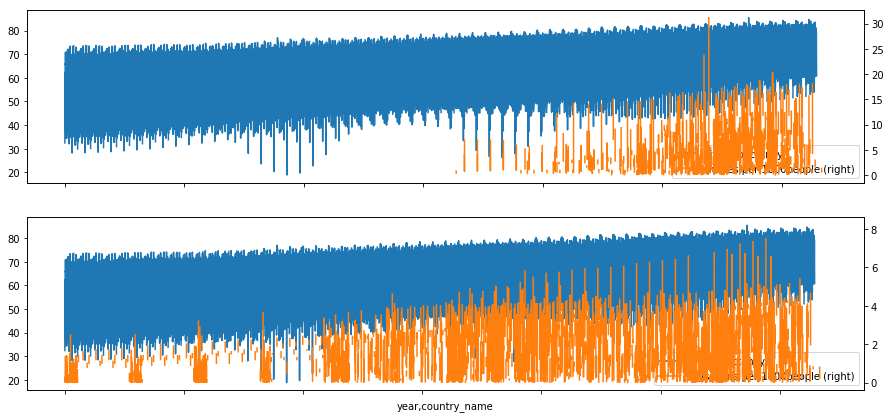

In [8]:
#Data Exploration
correlations = merged_data.corr()

#Example visualizaton, but still bullshit..
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.xlabel('Trends of Life Expectancy with Nurses')
data_wb['life expectancy at birth'].plot(label="Life Expectancy", legend=True, )
data_wb['nurses and midwives (per 1,000)'].plot(secondary_y=True, label="Nurses per 1000people", legend=True)

plt.subplot(2, 1, 2)
plt.xlabel('rends of Life Expectancy with Physicians')
data_wb['life expectancy at birth'].plot(label="Life Expectancy", legend=True, )
data_wb['physicians (per 1,000)'].plot(secondary_y=True, label="Physicians per 1000people", legend=True)

plt.savefig('NursesAndDoctorsToLifeExpectancy.png', bbox_inches='tight')
plt.show()